In [1]:
import pandas as pd

<h3> Part 1: Data Manipulation </h3>

In [2]:
fromage = pd.read_table(r"fromage.txt", sep="\t", header=0, index_col=0)

<h5> Description of the Cheese dataset </h5>

In [3]:
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

<h5> Affichage des attributs : </h5>

In [4]:
fromage.columns

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')

<h5> Data Visualization</h5>

In [5]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='calcium', ylabel='calories'>,
        <AxesSubplot:xlabel='lipides', ylabel='calories'>,
        <AxesSubplot:xlabel='retinol', ylabel='calories'>,
        <AxesSubplot:xlabel='folates', ylabel='calories'>,
        <AxesSubplot:xlabel='proteines', ylabel='calories'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='calories'>,
        <AxesSubplot:xlabel='magnesium', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='calcium', ylabel='sodium'>,
        <AxesSubplot:xlabel='lipides', ylabel='sodium'>,
        <AxesSubplot:xlabel='retinol', ylabel='sodium'>,
        <AxesSubplot:xlabel='folates', ylabel='sodium'>,
        <AxesSubplot:xlabel='proteines', ylabel='sodium'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='sodium'>

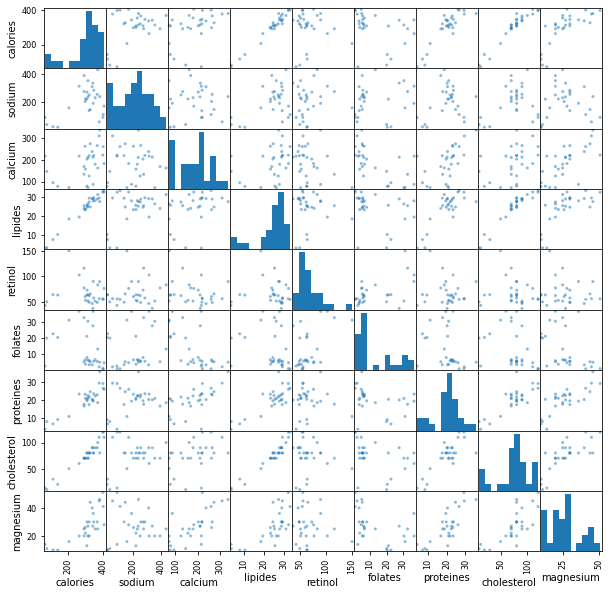

In [6]:
#Croissement 2 a 2 des variables
scatter_matrix(fromage, figsize= (10, 10))

<h5> Comment: </h5>
    - Calories and lipids attributes are strongly correlated
    <br>
    - The increase between the attributes Cholesterol and lipids shows the formation of the groups (correlated)
  

<h3> Part 2: Mobile center method </h3>

In the k-means algorithm, the number k of clusters is fixed at the start. From an initial partition, we seek to iteratively improve the partition by minimizing a certain criterion.

In [7]:
import numpy as np
from sklearn import cluster

<h5> Creation of the k-means model: </h5>

In [8]:
#With the seed reset (every time), the same set of numbers will appear every time.
np.random.seed(0)
#Définition de l'algorithme k-means
kmeans = cluster.KMeans(n_clusters = 4)

<h5> Learning: </h5>

In [9]:
kmeans.fit(fromage)

KMeans(n_clusters=4)

<h5> Prediction : </h5>

In [10]:
idk = np.argsort(kmeans.labels_)
print("Numéro        Observation\ncluster ")
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))

Numéro        Observation
cluster 
             Fromages
0            Parmesan
0            Beaufort
0         SaintPaulin
0            Vacherin
0            Emmental
0             Cheddar
0               Comte
0                Edam
1         Coulomniers
1            Pyrenees
1  Fr.chevrepatemolle
1         PontlEveque
1            Chaource
1           Chabichou
1                Tome
1             Babybel
2      Fr.frais20nat.
2      Fr.frais40nat.
2       Petitsuisse40
2  Yaourtlaitent.nat.
3          Rocquefort
3           Reblochon
3         CarredelEst
3           Maroilles
3              Cantal
3           Camembert
3                Bleu
3             Morbier
3         Fr.fondu.45


<h5>transform() </h5>(as the name already implies) returns something that is qualitatively similar to its input but expressed in a different form, i.e. scaled features, PCA features etc to unseen data.

In [11]:
print(kmeans.transform(fromage))

[[285.36163076 145.45179721 384.27301005 127.66904456]
 [118.43379084  84.03758274 303.10311983  93.02921551]
 [ 56.72603293 205.07356073 349.91323389 241.39308525]
 [200.30401971 150.63556291 393.76898843  39.24299576]
 [210.31138298 134.45026148 332.43471728  84.3287841 ]
 [111.73150994 155.73016828 371.97076666 109.43789941]
 [182.80599775  71.12160581 298.65300308 177.37236865]
 [204.98823213  65.55089864 311.48990553 104.25679538]
 [ 92.26223665 131.4224498  348.48685233 178.29581675]
 [ 79.32509258 196.16115266 333.83554522 252.73178678]
 [204.4018782   55.67198858 285.29211565 158.4463507 ]
 [ 43.74211715 165.35124073 293.81905359 196.77100465]
 [102.59674855 258.37172893 343.1669947  297.71373358]
 [265.24828993 151.44015423 195.86579908 257.98468612]
 [271.72958122 171.05399824 400.47054979  79.04276933]
 [336.96303256 300.49708453  27.57918146 389.61319628]
 [330.65941362 282.79253051  48.43507252 387.38459277]
 [169.20512053 147.91506114 379.74839203  53.53173975]
 [146.3164

<h5> The attributes of the centers of each cluster </h5>

In [12]:
#print(kmeans.cluster_centers_)
#for i in range(0, 4):
attributs = "         "
for j in range(0,8):
    attributs = attributs +  "  " +fromage.columns[j]
print(attributs)
for i in range(0, 4):
    coors = ""
    for j in range(0,8):
        coors = coors +  "   " +str(kmeans.cluster_centers_[i][j])[:6] 
    print("Cluster ", i +1, coors)


           calories  sodium  calcium  lipides  retinol  folates  proteines  cholesterol
Cluster  1    363.87   146.12   257.02   29.049   63.6   3.8625   26.562   96.25
Cluster  2    305.0   224.37   130.37   25.15   81.387   18.037   19.6   73.75
Cluster  3    101.75   44.75   133.75   6.2750   55.15   16.475   7.1999   18.25
Cluster  4    327.0   327.72   194.67   26.877   64.311   15.133   20.755   81.111


<h3> Helps find the right number of groups </h3>
The diagram is often the same: we vary the number of groups and we monitor the evolution of a quality indicator of the solution ie. the ability of individuals to be closer to their fellows in the same group than individuals from other groups.

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [14]:
#utilisation de la métrique "silhouette" 
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)

[0.50681355 0.37299771 0.3369907  0.35737616 0.32609984 0.2888388
 0.29480635 0.2872981  0.24638892]


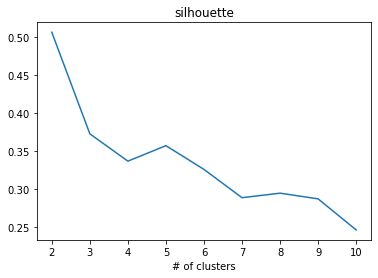

In [15]:
#graphique
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

<h5> 2 / </h5>
The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.
The silhouette ranges from -1 to +1, where a high value indicates that the object is well suited to its own cluster and poorly suited to neighboring clusters.
<h5> -> According to the silhouette metric, the best value of k (number of clusters) is 2 </h5>

<h3> Part 3: Ascending hierarchical classification </h3>
The hierarchical ascending classification (or CAH) proceeds by successive merging of sets of points (clusters), by initially considering all the points as singletons clusters, we merge at each step the 2 closest clusters in the sense of a distance, until you get a single cluster containing all t

In [16]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

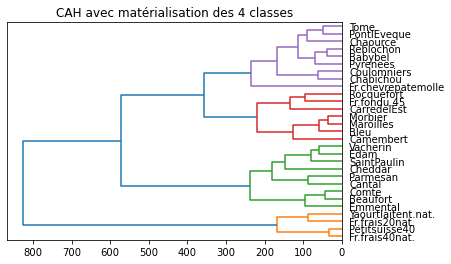

In [17]:
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title('CAH with materialization des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()

<h5> Comment: </h5>
- In the dendrogram there is a division into 4 groups. <br>
- The class containing "fresh cheeses" (orange color) stands out from the others to the point that we could also have considered dividing into 2 groups only.

In [18]:
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


<h5> Comment: We have 4 groups </h5>
 - The 1st group, represented by 1, is made up of Yaourtlaitent.nat., Petitsuisse40, Fr.frais40nat .., Fr.frais20nat ..
 <br>
 - The 2nd group, represented by 2, is made up of SaintPaulin, Beaufort, Cantal, Parmesan, Cheddar, Comte, Edam, Emmental, Vacherin
 <br>
 - The 3rd group, represented by 3, is made up of Rocquefort, Morbier, Maroilles, CarredelEst, Camembert, Bleu, Fr.fondu. 45
 <br>
 - The 4th group, represented by 4, is made up of Coulomniers, Chaource, Chabichou, PontlEveque, Pyrenees, Reblochon, Babybel, Tome, Fr.chevrepatemolle

In [19]:
percentile_list = pd.DataFrame(
    {'index': fromage.index[idk],
     'Classe CAH': groupes_cah[idk],
     'Classe Kmeans': kmeans.labels_[idk]
    })
percentile_list

,index,Classe CAH,Classe Kmeans
0,Parmesan,2,0
1,Beaufort,2,0
2,SaintPaulin,2,0
3,Vacherin,2,0
4,Emmental,2,0
5,Cheddar,2,0
6,Comte,2,0
7,Edam,2,0
8,Coulomniers,4,1
9,Pyrenees,4,1


<h3> Part 4: Interpretation of classes </h3>
Principal component analysis (PCA)

In [20]:
from sklearn.decomposition import PCA

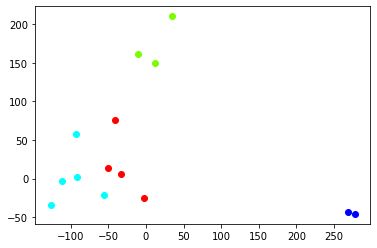

In [21]:
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

<h5> Comment: </h5>
- Class 3 is very well defined. <br>
- There are intersections between the other classes, so they are more complicated to understand.

<h3> Descending hierarchical algorithm (divisive clustering) based on the use of k-means </h3>

<h5> Principle: </h5>
- Bipartition the cheese dataset using k-means: <br>
    - Load the dataframe containing a dataset. <br>
    - Execute k-means on the data frame with k = 2. <br>
    - Divide the cheese dataset into two parts using the cluster assignments. <br>
- Perform recursive bipartitioning

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import time
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [111]:
def bipartition(cluster, kmeans):
    '''cluster: is a dict having 
                * dataframe: original data
                * centroid:  centroid for this particular cluster'''
    
    dataframe   = cluster['dataframe']
    kmeans.fit(dataframe)
    centroids, cluster_assignment = kmeans.cluster_centers_, kmeans.labels_
    
    # Divide the data matrix into two parts using the cluster assignments.
    left_child, right_child = dataframe[cluster_assignment==0], \
                                dataframe[cluster_assignment==1]
        
    
    # Package relevant variables for the child clusters
    cluster_left_child  = {
                           'dataframe': left_child,
                           'centroid': centroids[0]}
    cluster_right_child = {
                           'dataframe': right_child,
                           'centroid': centroids[1]}
    
    return (cluster_left_child, cluster_right_child)


First Partition:

In [103]:
fromage_data = {'dataframe': fromage} # no 'centroid' for the root cluster
left_child, right_child = bipartition(fromage_data, kmeans)

Visualization of the two sons:

In [112]:
left_child["dataframe"]

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51
Edam,327,148.0,272.2,24.7,65.7,5.5,24.7,80,44
Emmental,378,60.0,308.2,29.4,56.3,2.4,29.4,110,45
Parmesan,381,240.0,334.6,27.5,90.0,5.2,35.7,80,46
SaintPaulin,298,205.0,261.0,23.3,60.4,6.7,23.3,70,26
Vacherin,321,140.0,218.0,29.3,49.2,3.7,17.6,80,30


In [113]:
right_child["dataframe"]

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Fr.fondu.45,292,390.0,168.5,24.0,77.4,5.5,16.8,70,20
Maroilles,338,311.0,236.7,29.1,46.7,3.6,20.4,90,40
Morbier,347,285.0,219.0,29.5,57.6,5.8,23.6,80,30
Pyrenees,355,232.0,178.9,28.0,51.5,6.8,22.4,90,25
Reblochon,309,272.0,202.3,24.6,73.1,8.1,19.7,80,30


In [106]:
first_left_child = left_child
first_right_child = right_child

Deuxieme Partionnement :

In [108]:
left_left_child, right_left_child = bipartition(left_child, kmeans)

In [109]:
left_right_child, right_right_child = bipartition(right_child , kmeans)

<h5> Arbre Obtenue (divide analysis) : </h5>

In [133]:
print("")
print("                                         Cluster (", len(fromage_data["dataframe"]), ')')
print("                                      ____|       |_____")
print("                   Cluster 0 (", len(first_left_child["dataframe"]),")                       Cluster 1 (", len(first_right_child["dataframe"]),")")
print("                 ____|       |_____                 ____|       |_____")
print("     Cluster 0 (", len(left_left_child["dataframe"]),")      Cluster 1 (", len(right_left_child["dataframe"]),")         Cluster 0 (", len(left_right_child["dataframe"]),")      Cluster 1 (", len(right_right_child["dataframe"]),")")


                                         Cluster ( 29 )
                                      ____|       |_____
                   Cluster 0 ( 8 )                       Cluster 1 ( 10 )
                 ____|       |_____                 ____|       |_____
     Cluster 0 ( 3 )      Cluster 1 ( 1 )         Cluster 0 ( 1 )      Cluster 1 ( 4 )
